Importing the required libraries

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
from sklearn import preprocessing  # For data preprocessing

# Import custom utility functions
from utils import merge_text, get_cleaned_text  # Custom text processing functions
from utils_EDA import (
    get_label_dist,     # Function to get label distribution
    plot_wordCloud,     # Function to plot word cloud
    show_donut_plot,    # Function to show donut plot
    get_character_dist, # Function to get character distribution
    get_word_dist,      # Function to get word distribution
    plt_n_gram_dist     # Function to plot n-gram distribution
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhruv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading the data

In [2]:
# Read the training and validation datasets
df = pd.read_csv("Data/stack_overflow_questions_train.csv")  # Read training data
df_test = pd.read_csv("Data/stack_overflow_questions_valid.csv")  # Read validation data

# Convert 'CreationDate' column to datetime format
df['CreationDatetime'] = pd.to_datetime(df['CreationDate'])

# Extract month and year from 'CreationDatetime' column
df['CreationMonth'] = df['CreationDatetime'].dt.month.astype(int)  # Extract month as integer
df['CreationYear'] = df['CreationDatetime'].dt.year.astype(int)    # Extract year as integer

# Display the first few rows of the DataFrame 
df.head()


Id                                              Title  \
0  34552656             Java: Repeat Task Every Random Seconds   
1  34553034                  Why are Java Optionals immutable?   
2  34553174  Text Overlay Image with Darkened Opacity React...   
3  34553318         Why ternary operator in swift is so picky?   
4  34553755                 hide/show fab with scale animation   

                                                Body  \
0  <p>I'm already familiar with repeating tasks e...   
1  <p>I'd like to understand why Java 8 Optionals...   
2  <p>I am attempting to overlay a title over an ...   
3  <p>The question is very simple, but I just cou...   
4  <p>I'm using custom floatingactionmenu. I need...   

                                                Tags         CreationDate  \
0                                     <java><repeat>  2016-01-01 00:21:59   
1                                   <java><optional>  2016-01-01 02:03:20   
2  <javascript><image><overlay><react-native><opa...  2016-01-01 02:48:24   
3  <swift><operators><whitespace><ternary-operato...  2016-01-01 03:30:17   
4  <android><material-design><floating-action-but...  2016-01-01 05:21:48   

          Y    CreationDatetime  CreationMonth  CreationYear  
0  LQ_CLOSE 2016-01-01 00:21:59              1          2016  
1        HQ 2016-01-01 02:03:20              1          2016  
2        HQ 2016-01-01 02:48:24              1          2016  
3        HQ 2016-01-01 03:30:17              1          2016  
4        HQ 2016-01-01 05:21:48              1          2016

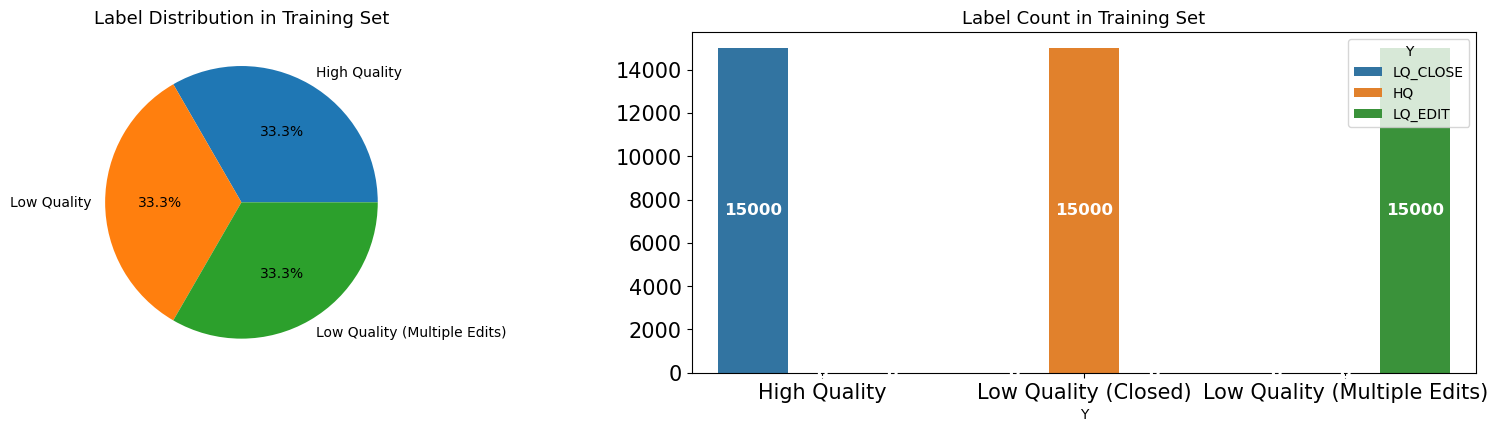

In [3]:
get_label_dist(df)

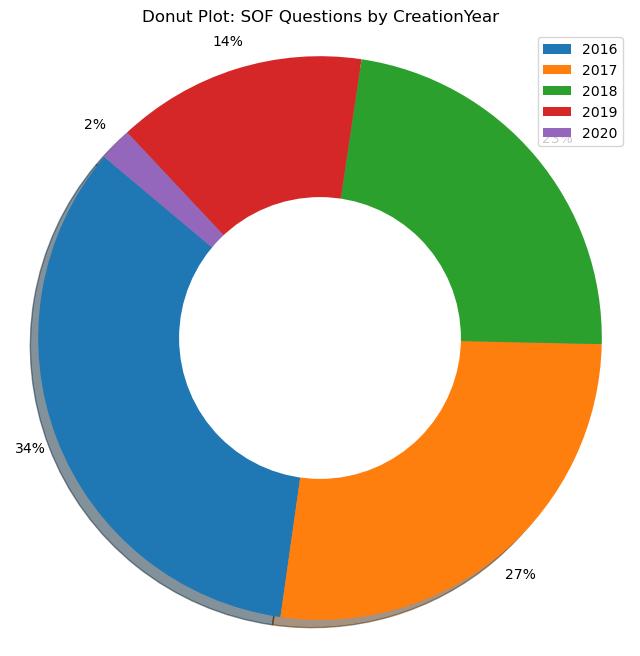

In [4]:

show_donut_plot(df,'CreationYear')

In [5]:
df = merge_text(df)  # Merge 'title' and 'body' into a single column 'text'

# Initialize LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'class'
df['class'] = label_encoder.fit_transform(df['class'])  # Encode categorical labels in 'class' column

# Display unique encoded labels
df['class'].unique()  # Print unique encoded labels to verify encoding

# Clean text data using custom function get_cleaned_text
df = get_cleaned_text(df, False)  # Clean text data in 'text' column, with parameter  to remove stop words set to False

Total number of samples: 45000


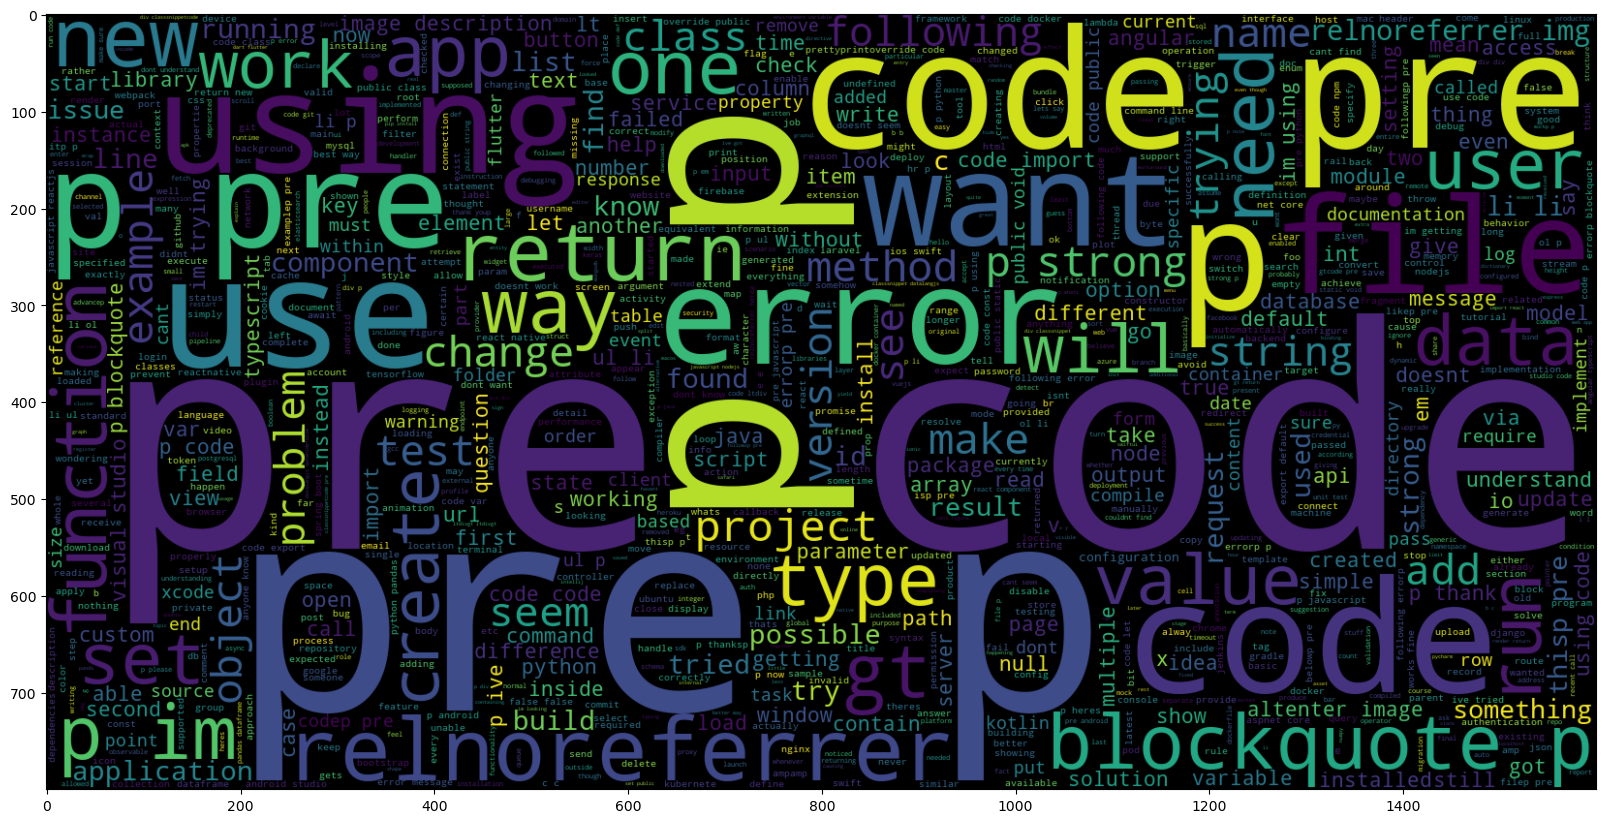

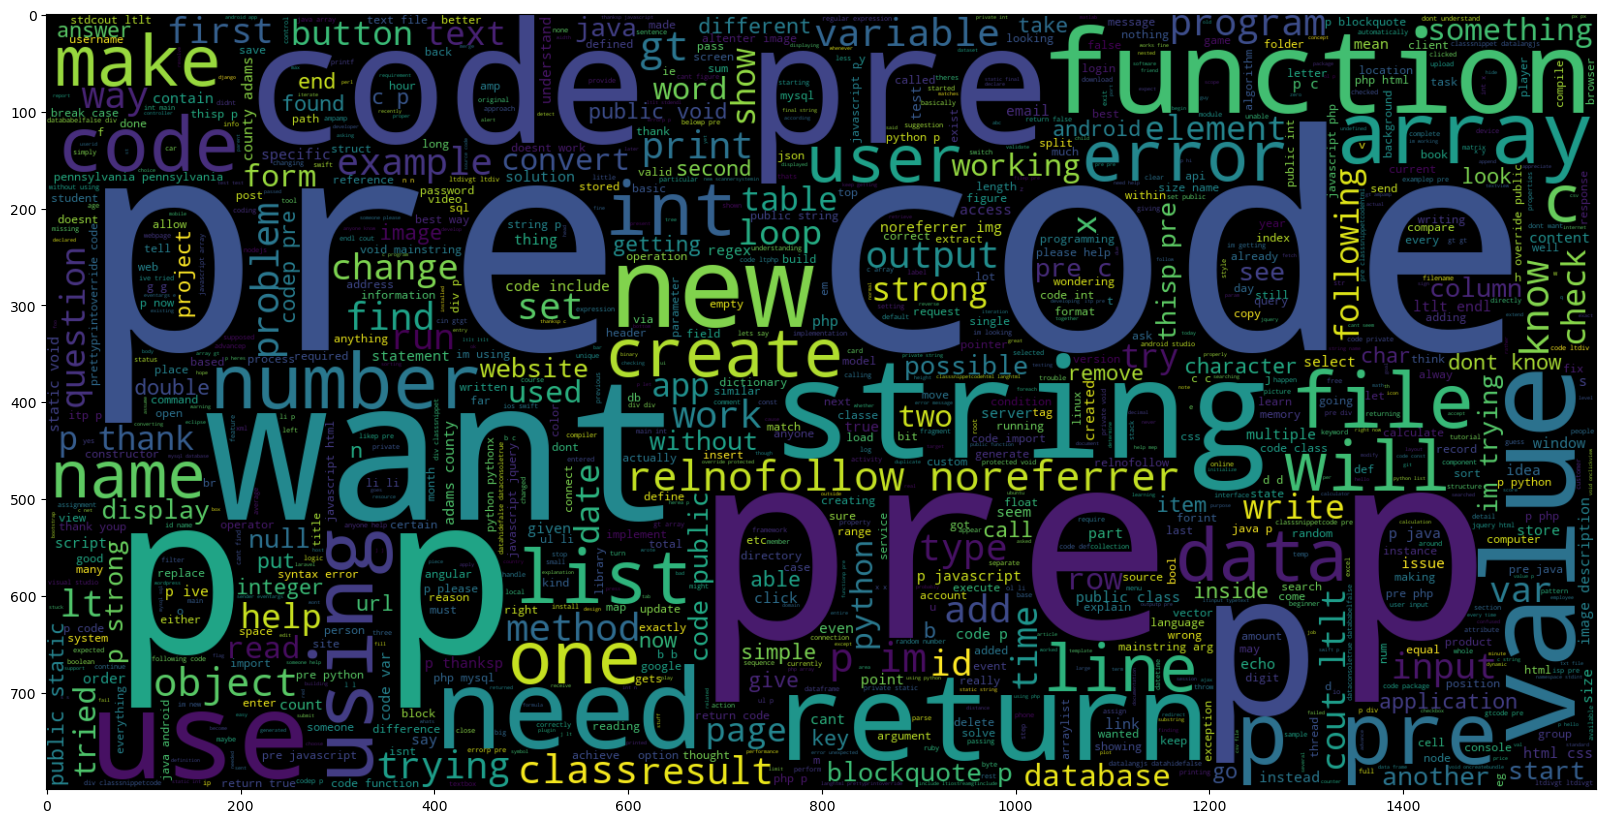

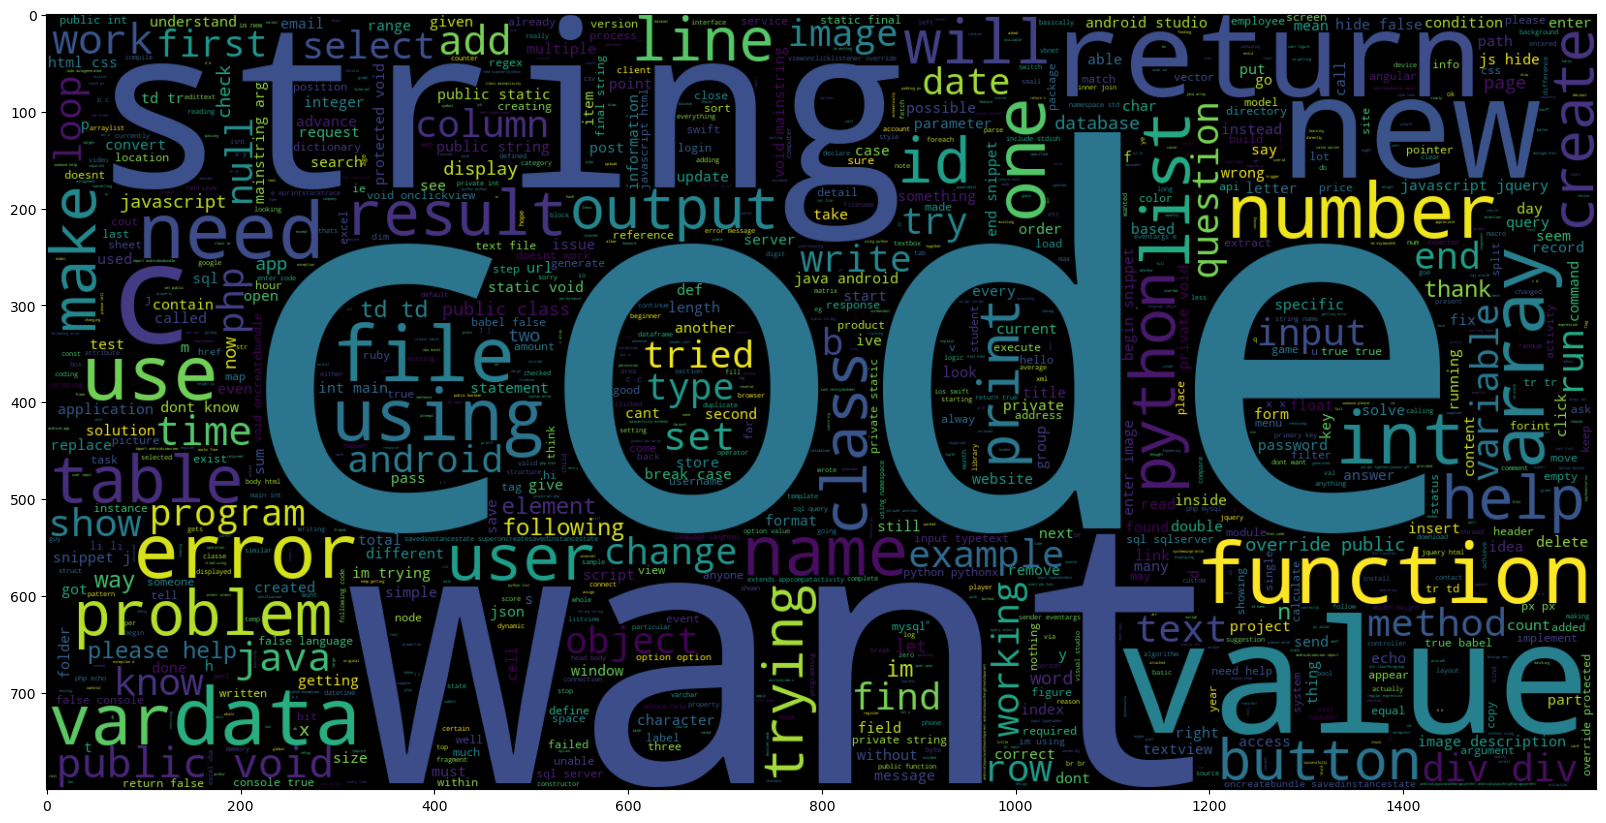

In [6]:
# Plot word cloud for category 0 in DataFrame df
plot_wordCloud(df, 0)

# Plot word cloud for category 1 in DataFrame df
plot_wordCloud(df, 1)

# Plot word cloud for category 2 in DataFrame df
plot_wordCloud(df, 2)

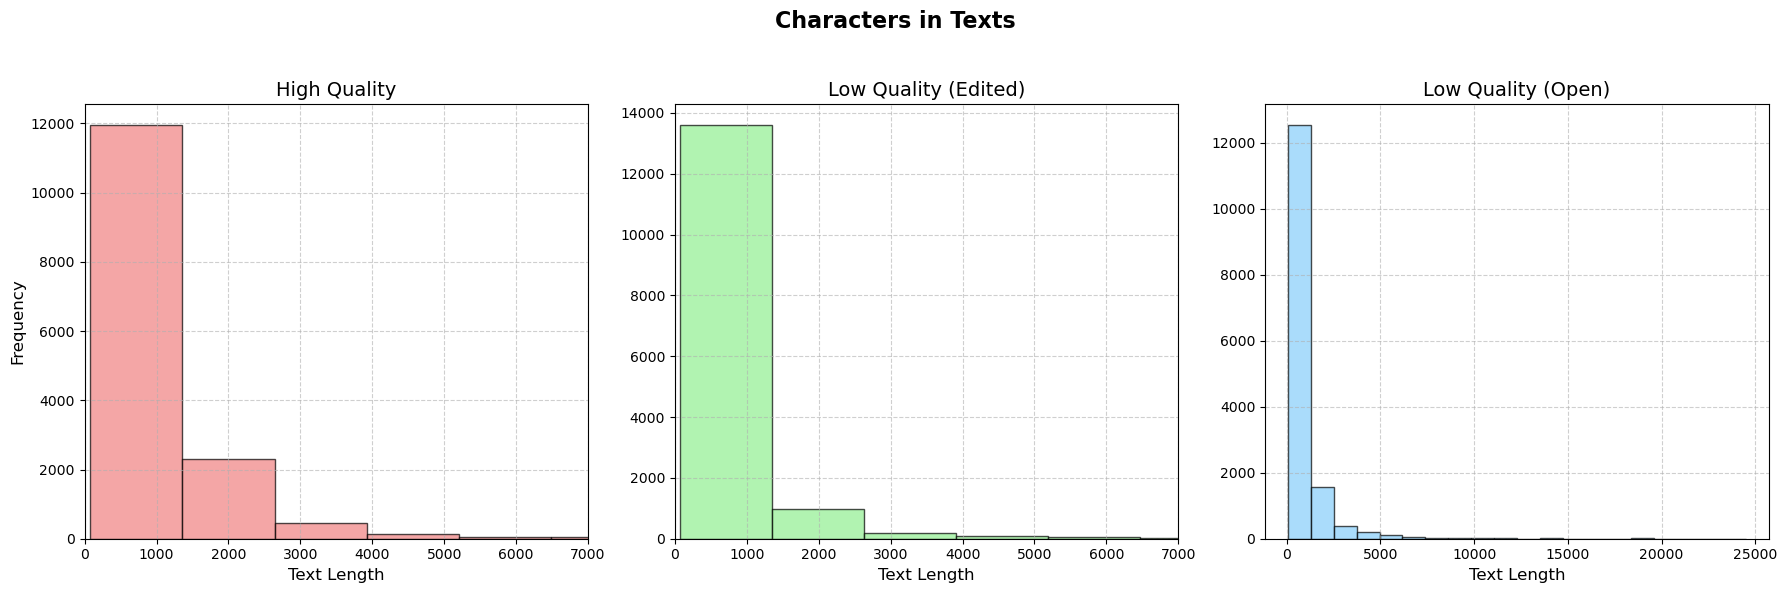

In [7]:
#Display  the character distribution data
character_distribution = get_character_dist(df)

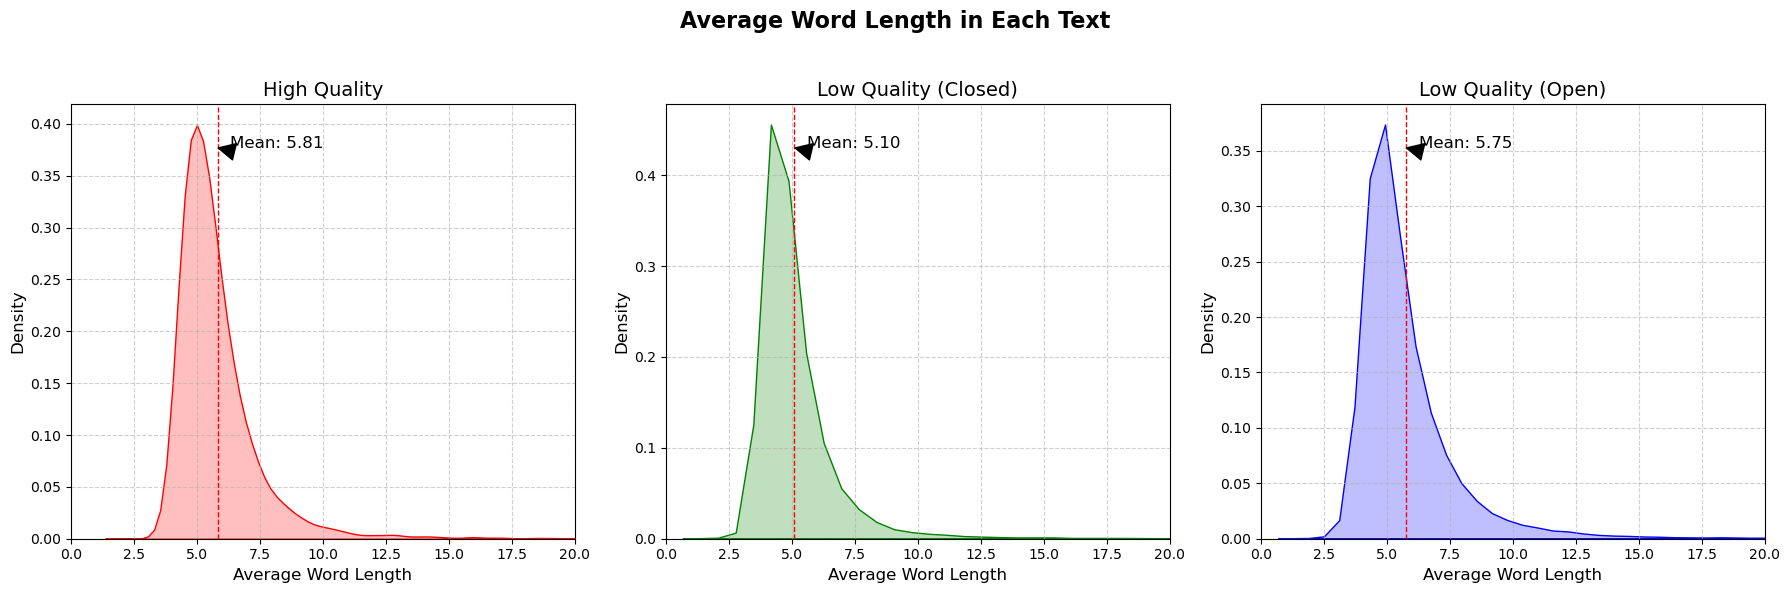

In [8]:
# Display the word distribution of each class
get_word_dist(df)

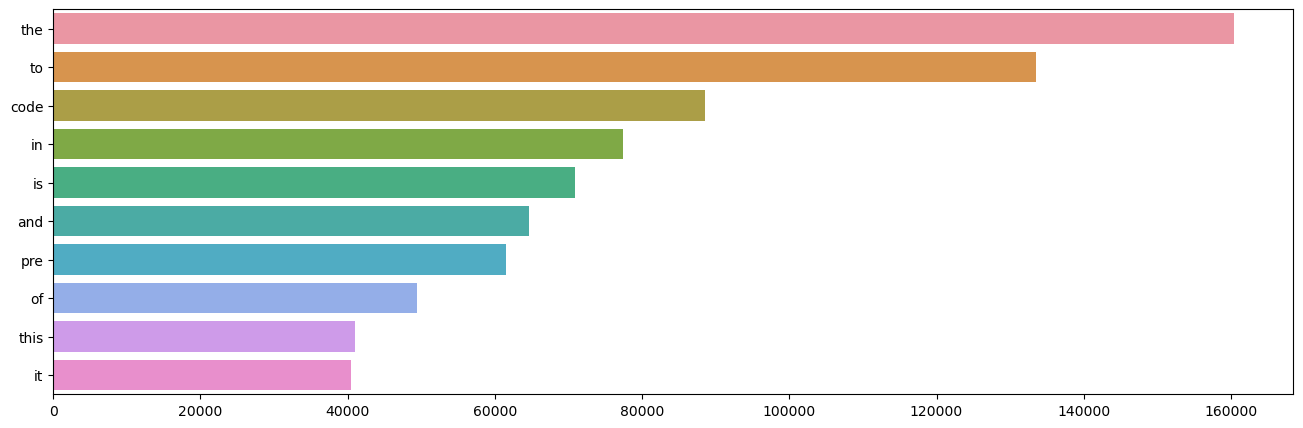

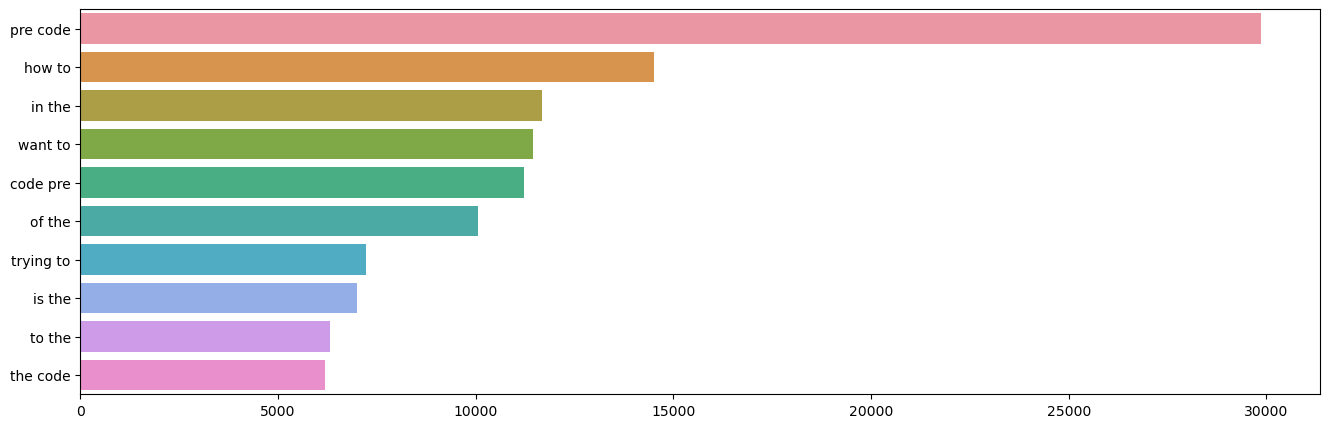

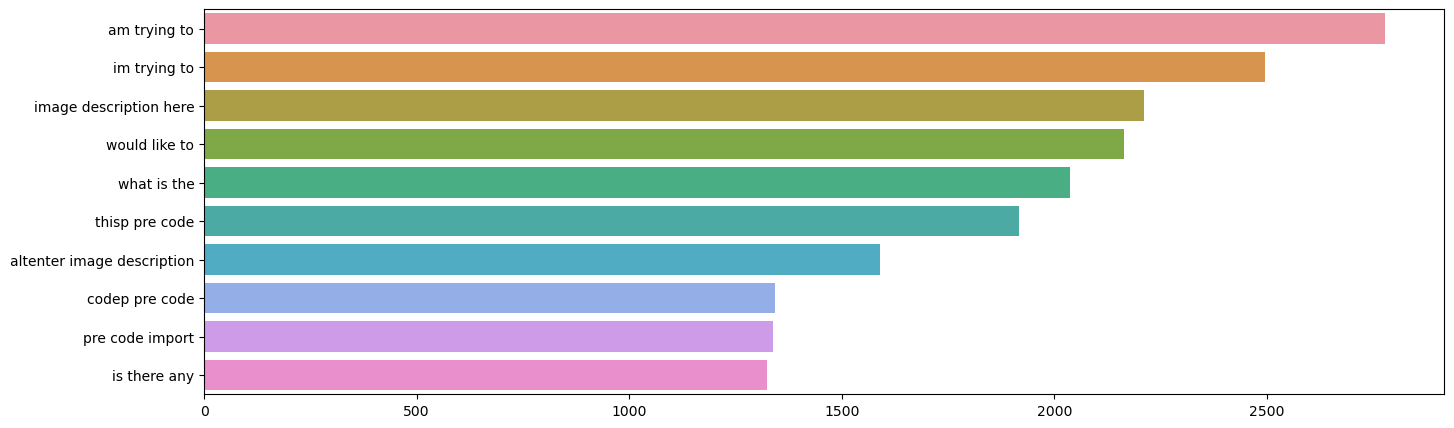

In [9]:
# Plot Unigram, Bigram and Trigrams
plt_n_gram_dist(df,1)
plt_n_gram_dist(df,2)
plt_n_gram_dist(df,3)

We check the number of Null elements in the dataset. There are zero null elements

In [10]:
df.isna().sum() # Checking for nan Values

text     0
class    0
dtype: int64

Here we are cleaning the dataset by removing unnecessary words and removing stop words.
We also removed words with length less than three from our data.

In [11]:
# Cleaning the data by removing the stopwords
df = get_cleaned_text(df, True)

We analyse the words in the cloud with the high quality text

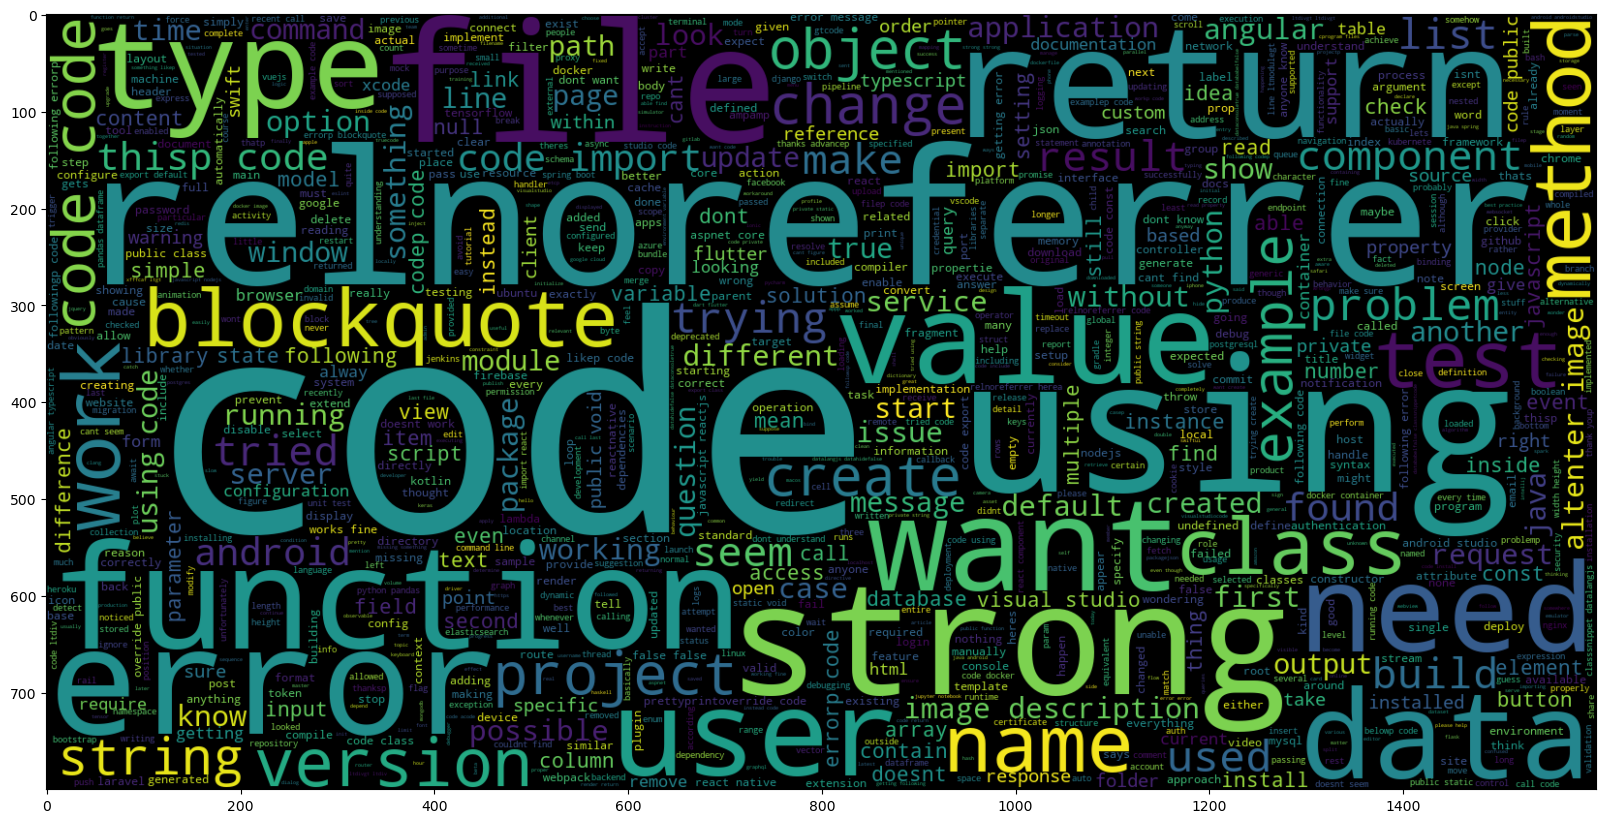

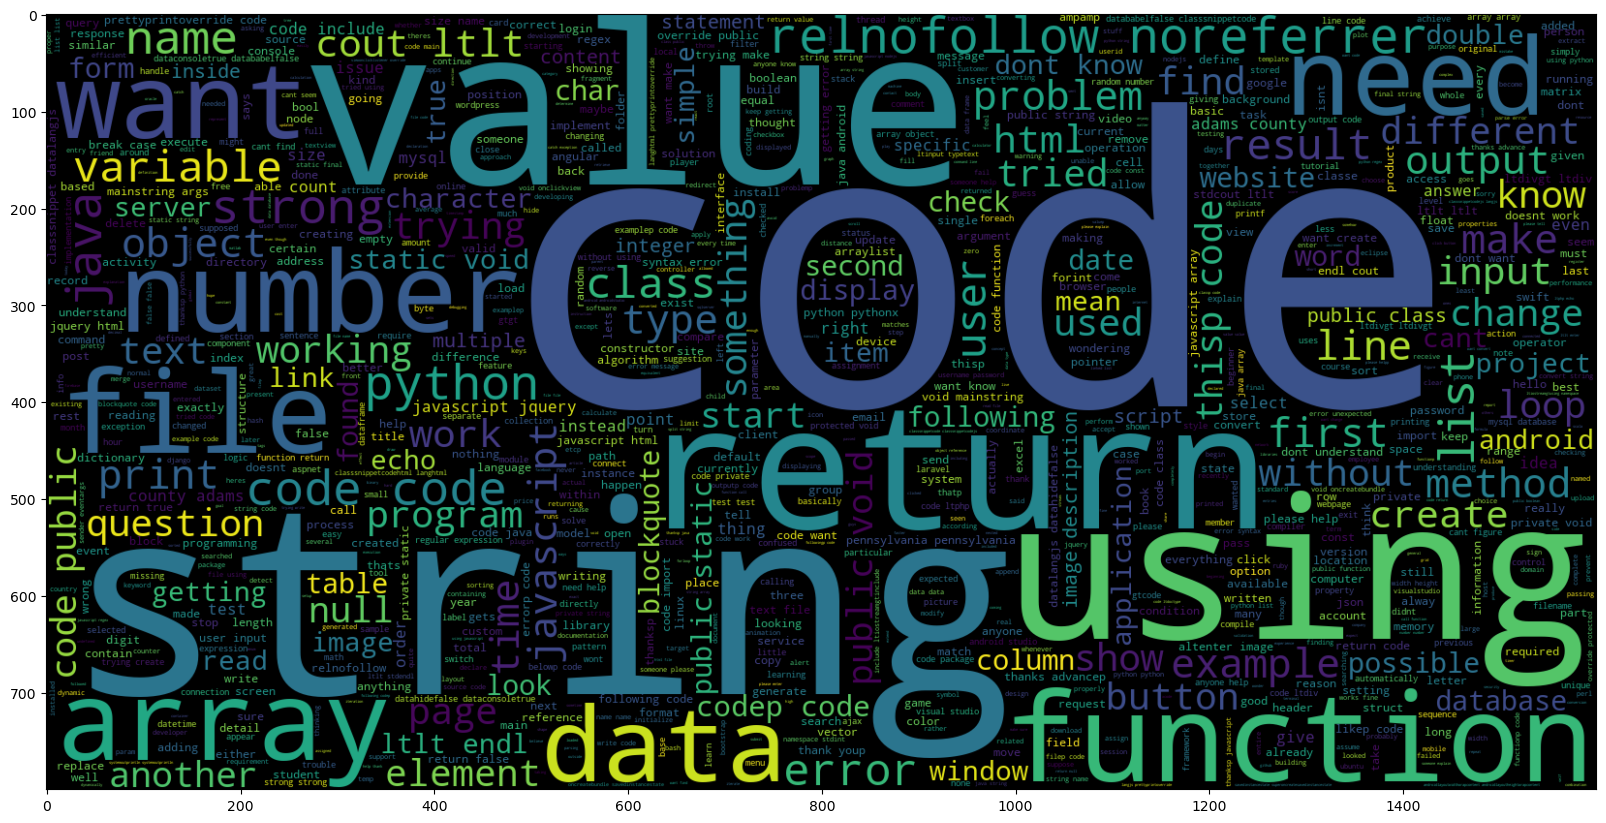

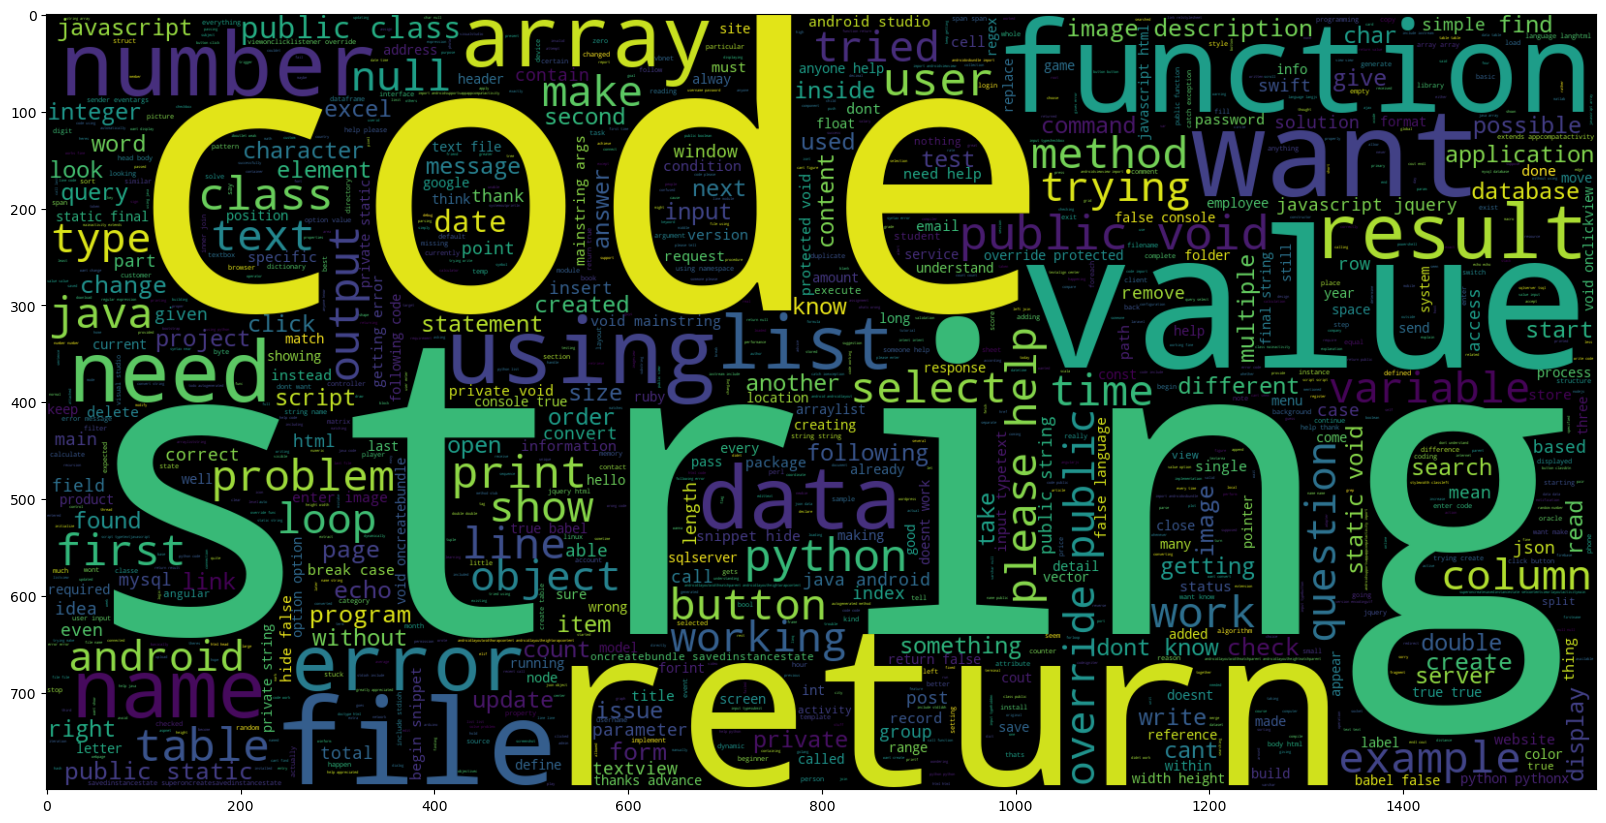

In [12]:
plot_wordCloud(df,0)
plot_wordCloud(df,1)
plot_wordCloud(df,2)

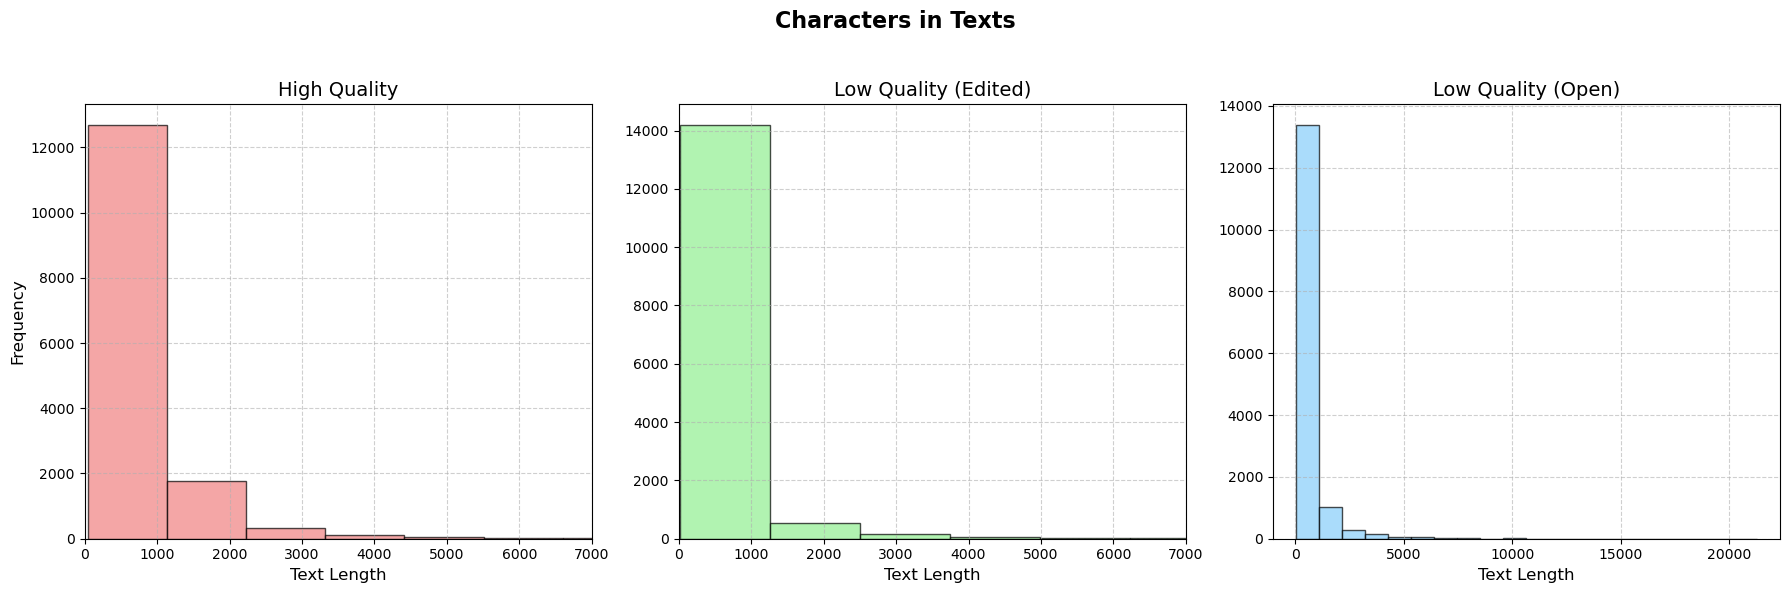

In [13]:
get_character_dist(df)

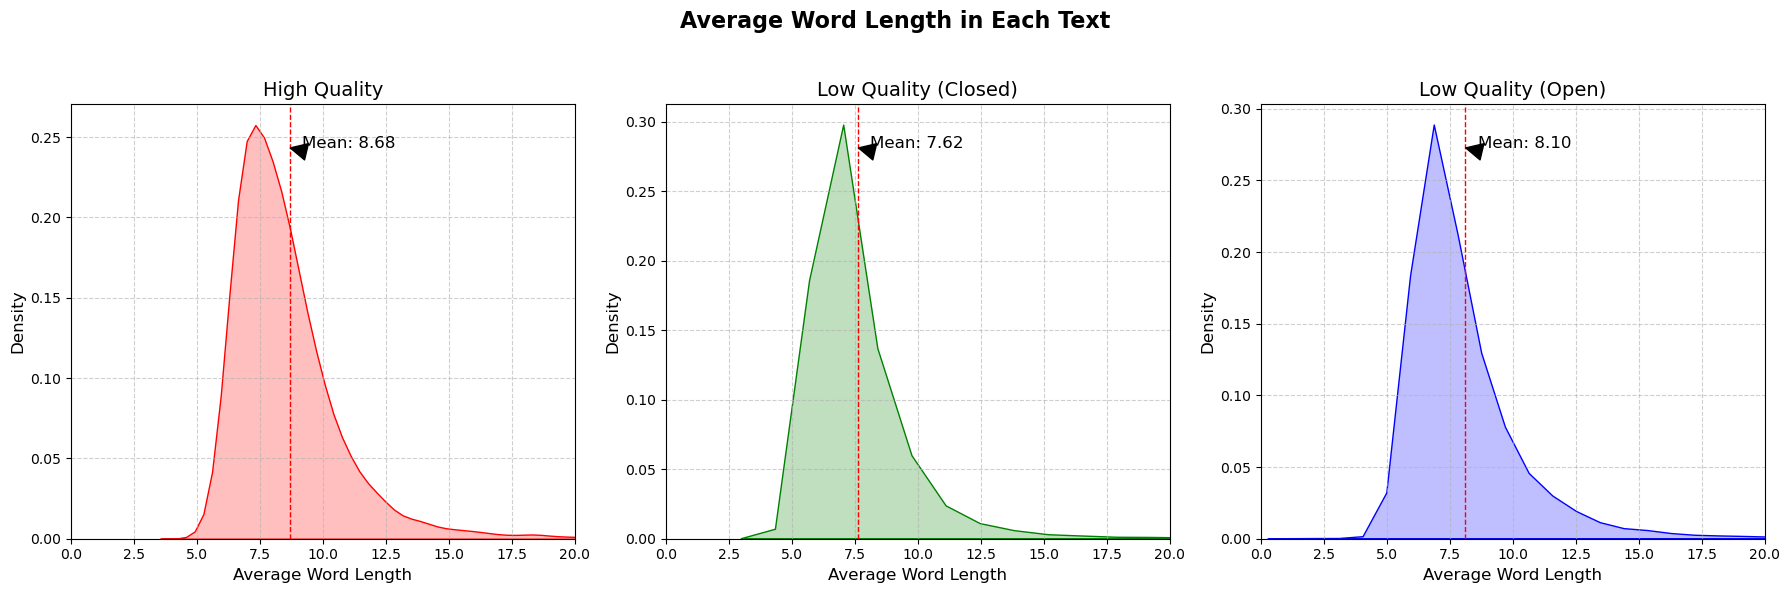

In [14]:
get_word_dist(df)

In [15]:
plt_n_gram_dist(df,1)
plt_n_gram_dist(df,2)
plt_n_gram_dist(df,3)